# Tutorial

## Import modules

This tutorial describes how you can detect sequences in multi-neuronal spiking activity data.

In [1]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt
from spykesim import editsim
from gendata import gendata
from scipy.ndimage.filters import gaussian_filter1d
from tqdm import tqdm
%matplotlib inline

In [2]:
df, binmat = gendata()

Text(0,0.5,'Neuron#')

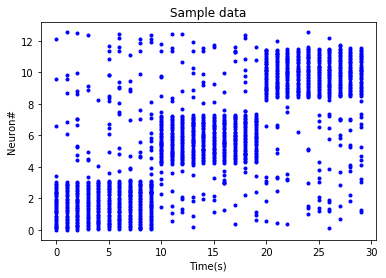

In [3]:
plt.plot(df.neuronid, df.spiketime, "b.")
plt.title("Sample data")
plt.xlabel("Time(s)")
plt.ylabel("Neuron#")

If you would like to calculate the edit similarity between two partial neuronal activity data, you may use the function `_sim`:

# Edit similarity calculation

In [4]:
a = 0.01
es = editsim.FromBinMat(alpha=a)

In [5]:
mat1 = binmat[:, 0:200].toarray()
mat2 = binmat[:, 200:400].toarray()
sim, _, _, _ = es._sim(mat1, mat2)
print(f"The edit similarity between mat1 and mat2 is {sim}")

The edit similarity between mat1 and mat2 is 16.50254185470943


Or, if you want to divide the original neuronal data into the same length of segments and calculate the similarity matrix, you can do like follows:

In [6]:
window = 100 # ms
es.gensimmat(
    binmat, window=window, slide=window, numband=4, bandwidth=5, minhash=False
)

[2019-04-15 15:04:53,723] [MainThread] Execution of a function gensimmat starts
[2019-04-15 15:04:53,724] [MainThread] Execution of a function _eval_simvec starts
[2019-04-15 15:04:54,445] [MainThread] submit end
[2019-04-15 15:04:54,449] [MainThread] Progress of the calculation
100%|██████████| 133/133 [00:08<00:00, 15.0it/s]
[2019-04-15 15:05:03,374] [MainThread] Progress of the aggregation
133it [00:00, 180414.76it/s]
[2019-04-15 15:05:03,376] [MainThread] calculation end


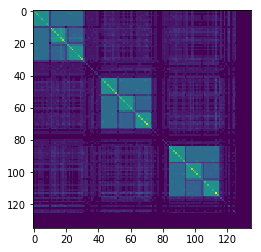

In [7]:
plt.imshow(es.simmat)

# Clustering

You can clustering the segments using the simirality matrix:

In [8]:
es.clustering(min_cluster_size=10)

In [9]:
es.cluster_labels

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, -1,  3,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2])

In [10]:
es.gen_profile()

100%|██████████| 57/57 [00:01<00:00, 48.71it/s]


Below shows profiles that represents repeatedly-appeared spatiotemporal structures in the data.

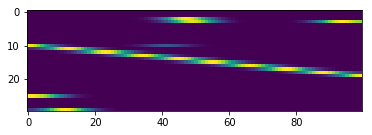

In [11]:
plt.imshow(es.profiles[0])

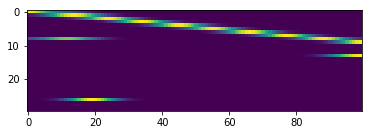

In [12]:
plt.imshow(es.profiles[1])

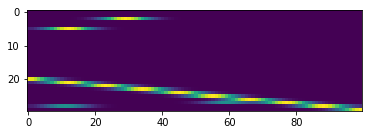

In [13]:
plt.imshow(es.profiles[3])